In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

## what are we going to cover ?

- Matploylib workflow
- Importing Matplotlib and the 2 ways of plotting
- Plotting data from NumPy arrays
- Plotting data from pandas DataFrames
- Customizing plots
- Saving and sharing plots

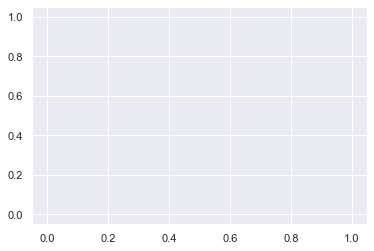

In [2]:
plt.plot(); # if we dont want to put ; at the end, we can use plt.show() at the end of the script

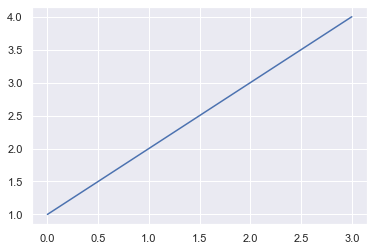

In [3]:
plt.plot([1, 2, 3, 4]);

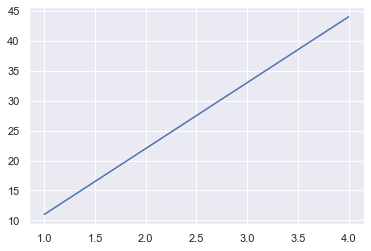

In [4]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x,y);

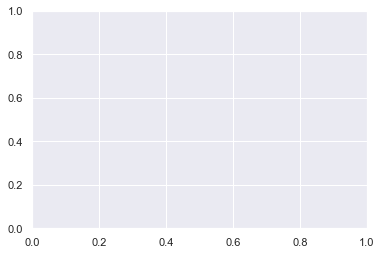

In [5]:
# 1st method
fig = plt.figure() # Create figure
ax = fig.add_subplot() # adds some axes
plt.show()

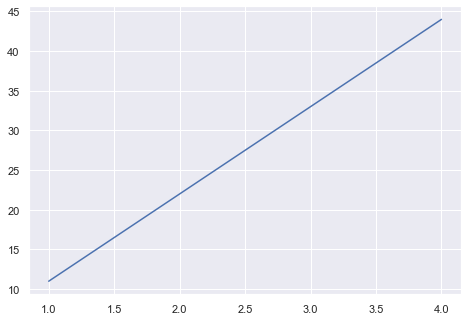

In [6]:
# 2nd method
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

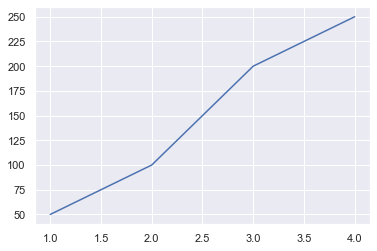

In [7]:
# 3th method (recommended)
fig, ax = plt.subplots()
ax.plot(x, [50, 100, 200, 250]); # add some data

# Matplotlib example workflow 

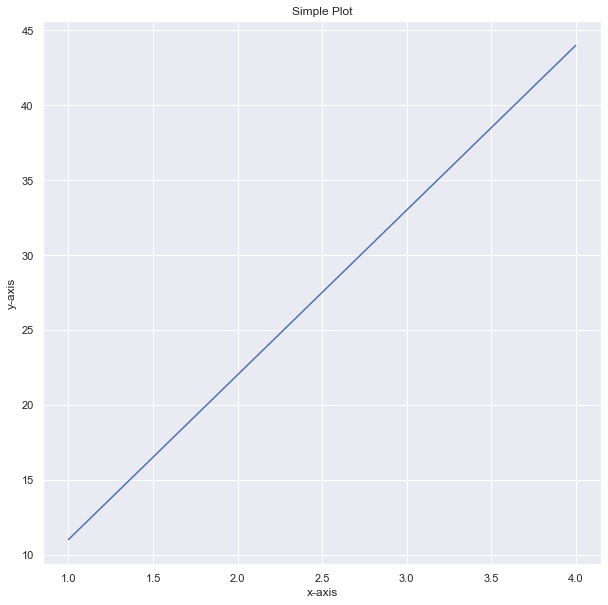

In [8]:
# 0. Import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data 
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # (Width, Height )

# 3. Plot data 
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot",
      xlabel= "x-axis",
      ylabel="y-axis")

# 5. Save & show
fig.savefig("../data/figures/sample-plot.png")

## Making figures with NumPy arrays

we will create :

* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [9]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

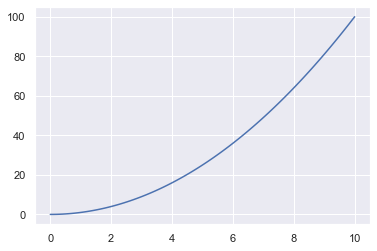

In [10]:
# Plot the data
fig, ax = plt.subplots()
ax.plot(x, x**2);

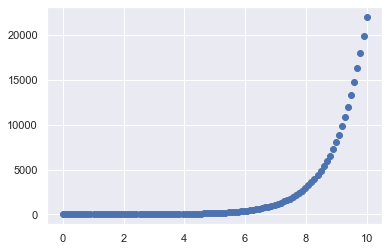

In [11]:
# Use the same data to make a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

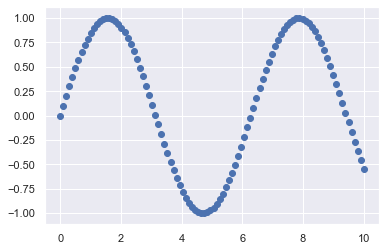

In [12]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

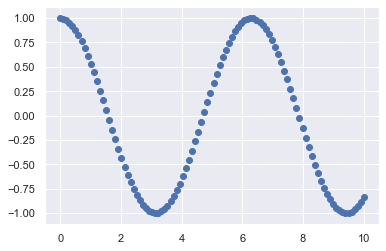

In [13]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.cos(x));

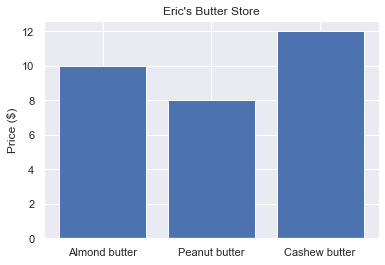

In [14]:
# Make a vertical plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                    "Peanut butter": 8,
                    "Cashew butter": 12}

fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), height=nut_butter_prices.values())
ax.set(title="Eric's Butter Store",
      ylabel="Price ($)");

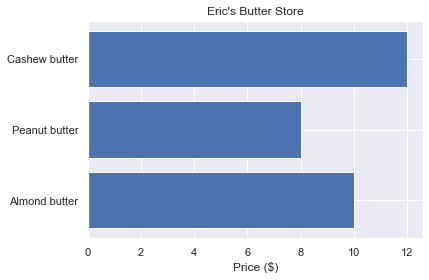

In [15]:
# Make a horizontal plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                    "Peanut butter": 8,
                    "Cashew butter": 12}

fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))
ax.set(title="Eric's Butter Store",
      xlabel="Price ($)");

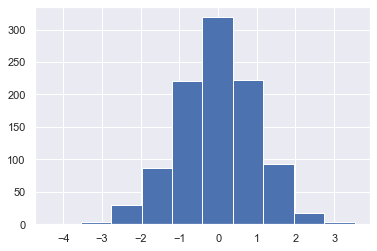

In [16]:
# Make histogram
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

# Make some subplots
# - Option 1 (reccommended):

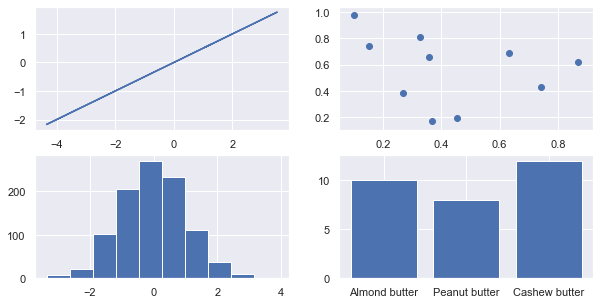

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10, 5))

# plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.hist(np.random.randn(1000));
ax4.bar(nut_butter_prices.keys(), height=nut_butter_prices.values());

# - Option 2:

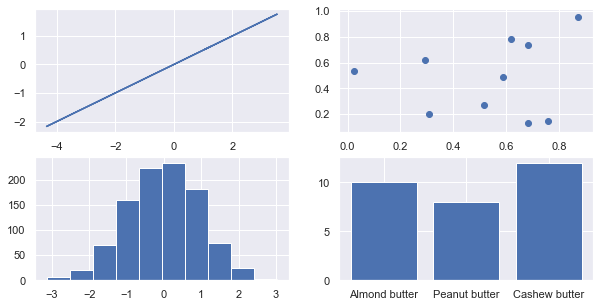

In [18]:
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10, 5))

# plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].hist(np.random.randn(1000));
ax[1, 1].bar(nut_butter_prices.keys(), height=nut_butter_prices.values());

## Plotting from pandas DataFrames

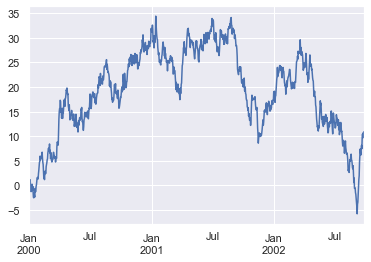

In [19]:
# first example:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()
ts.plot();

In [20]:
df = pd.read_csv("../data/raw/car-sales.csv")

In [21]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [22]:
# Removing $,. from Price
df['Price'] = df['Price'].str.replace('[\$\,\.]', '')

In [23]:
# Remove the two last zeros
df['Price'] = df['Price'].str[:-2]

In [24]:
df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [25]:
# Adding date column
df['Sale Date'] = pd.date_range('1/1/2020', periods=len(df))

In [26]:
df

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [27]:
# Adding Total Sales column
df['Total Sales'] = df['Price'].astype(int).cumsum()

In [28]:
df

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


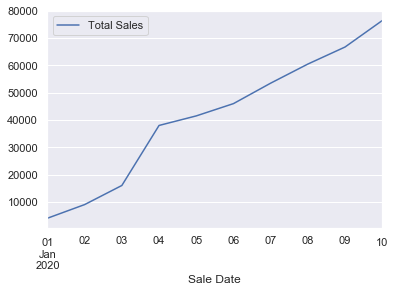

In [29]:
# Let's plot the totale sales
df.plot(x="Sale Date", y ="Total Sales");

In [30]:
df['Price'] = df['Price'].astype(int)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


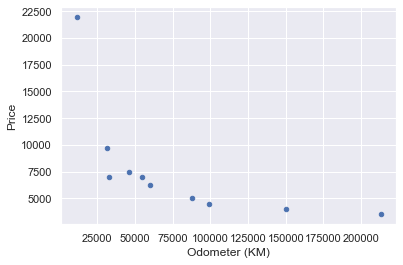

In [31]:
# Scatter plot
df.plot(x= "Odometer (KM)", y="Price", kind="scatter");

In [32]:
x = np.random.rand(10, 4)
x

array([[0.48232337, 0.96063782, 0.45985978, 0.60494638],
       [0.9475612 , 0.37397511, 0.45753045, 0.2351175 ],
       [0.59837203, 0.60459827, 0.53674608, 0.26915538],
       [0.25114392, 0.5302669 , 0.44498083, 0.90832652],
       [0.5112314 , 0.53090958, 0.15540549, 0.11554054],
       [0.04172747, 0.80884285, 0.10242959, 0.26573812],
       [0.66778212, 0.61397222, 0.34802465, 0.00125414],
       [0.42378655, 0.31104298, 0.61022346, 0.00143638],
       [0.92352468, 0.10313867, 0.16890957, 0.91784728],
       [0.93391467, 0.10467709, 0.01683093, 0.73170804]])

In [33]:
df_x = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])

In [34]:
df_x

,a,b,c,d
0,0.482323,0.960638,0.459860,0.604946
1,0.947561,0.373975,0.457530,0.235117
2,0.598372,0.604598,0.536746,0.269155
3,0.251144,0.530267,0.444981,0.908327
4,0.511231,0.530910,0.155405,0.115541
5,0.041727,0.808843,0.102430,0.265738
6,0.667782,0.613972,0.348025,0.001254
7,0.423787,0.311043,0.610223,0.001436
8,0.923525,0.103139,0.168910,0.917847
9,0.933915,0.104677,0.016831,0.731708


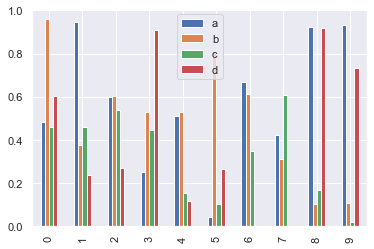

In [35]:
df_x.plot(kind='bar');

In [36]:
df

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


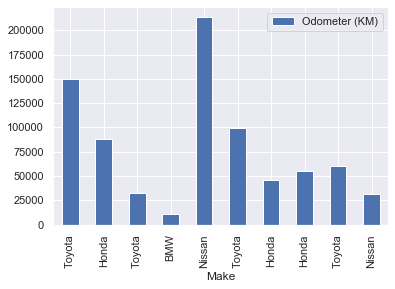

In [37]:
df.plot(x="Make", y="Odometer (KM)", kind='bar');

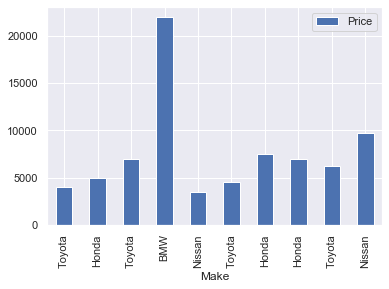

In [38]:
df.plot(x="Make", y="Price", kind='bar');

In [39]:
avg_KM_by_Make = df.groupby("Make")['Odometer (KM)'].agg("mean")
avg_KM_by_Make

Make
BMW        11179.000000
Honda      62778.333333
Nissan    122347.500000
Toyota     85451.250000
Name: Odometer (KM), dtype: float64

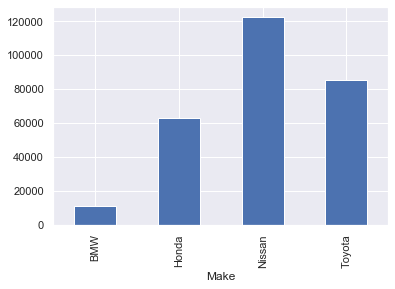

In [40]:
avg_KM_by_Make.plot.bar();

In [41]:
avg_price_by_make = df.groupby("Make")['Price'].agg("mean")
avg_price_by_make

Make
BMW       22000.0
Honda      6500.0
Nissan     6600.0
Toyota     5437.5
Name: Price, dtype: float64

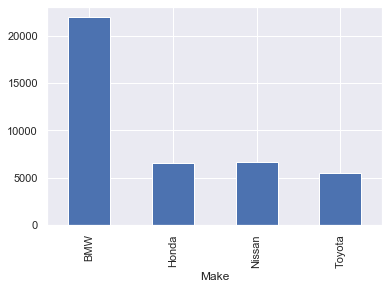

In [42]:
avg_price_by_make.plot.bar();

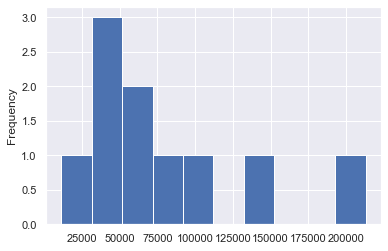

In [43]:
df['Odometer (KM)'].plot.hist(bins=10);

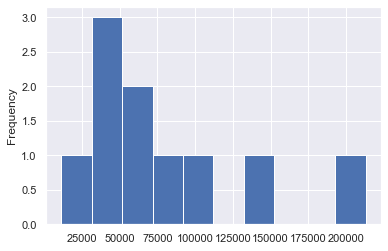

In [44]:
df['Odometer (KM)'].plot(kind="hist");

In [45]:
heart_disease = pd.read_csv('../data/raw/heart-disease.csv')

In [46]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


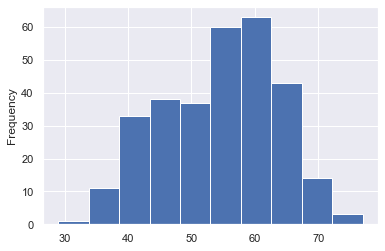

In [47]:
# Create a histogram of age
heart_disease['age'].plot.hist();

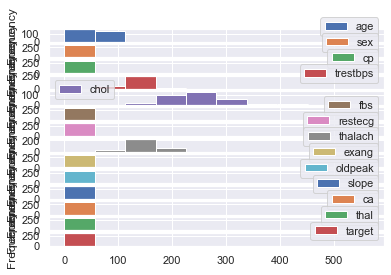

In [48]:
heart_disease.plot.hist(subplots=True);

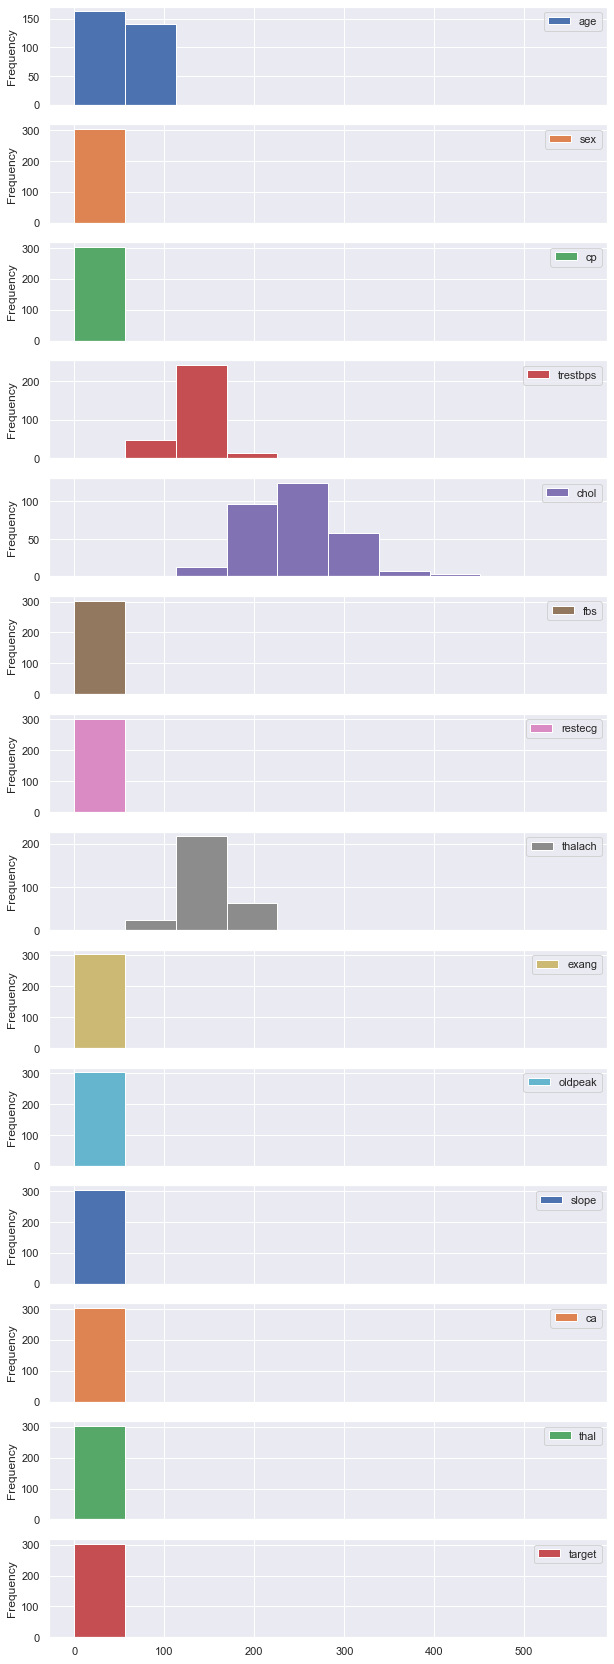

In [49]:
heart_disease.plot.hist(figsize=(10, 30),subplots=True);

- When plotting something quickly, we can use the (`pyplot`) method

- When plotting something more advanced, use the (`OO`) method


In [50]:
over_50 = heart_disease[heart_disease['age'] > 50]

In [51]:
len(over_50)

208

In [52]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


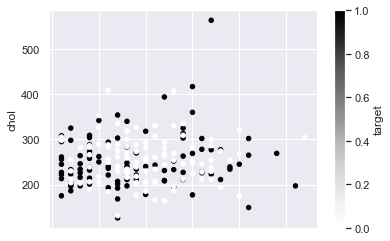

In [53]:
# Plotting directly with pyplot method
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target'); # C here is used for colour => we will colour by the target column

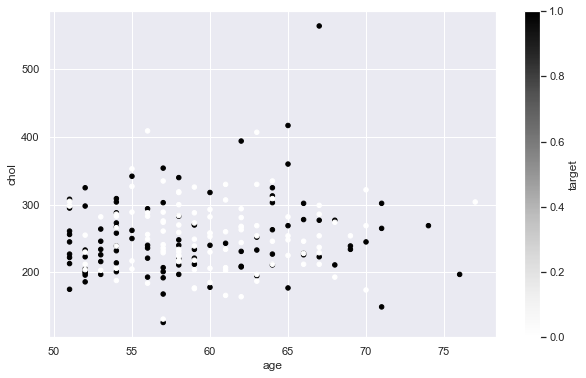

In [54]:
# plotting based on the OO method
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax);

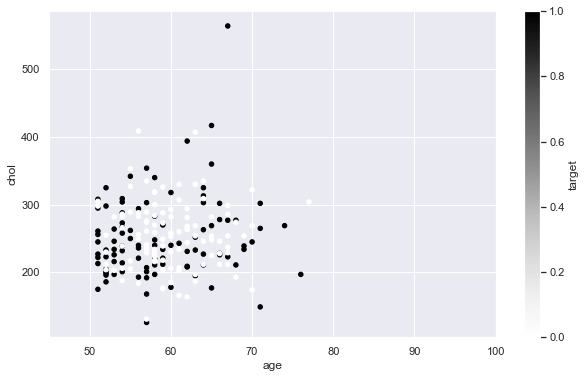

In [55]:
# plotting based on the OO method miwex with pyplot method
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax)
ax.set_xlim([45, 100]);

## OO Matplotlib method from scratch

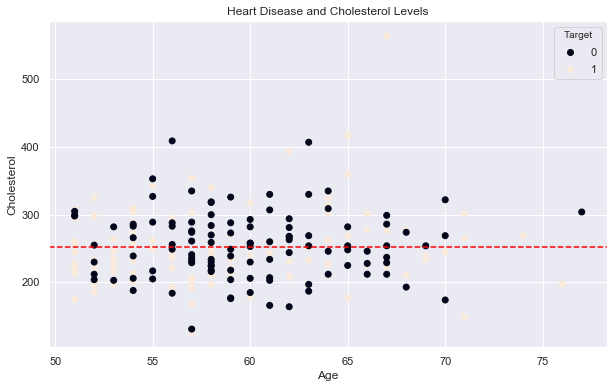

In [56]:
## OO Matplotlib method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# plot the data
scatter = ax.scatter(x=over_50['age'],
                    y=over_50['chol'],
                    c=over_50['target'])


# Customize the plot
ax.set(title= "Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title='Target')

# Add a horizontal line
ax.axhline(over_50['chol'].mean(),
          linestyle='--',
          c='red');

In [57]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


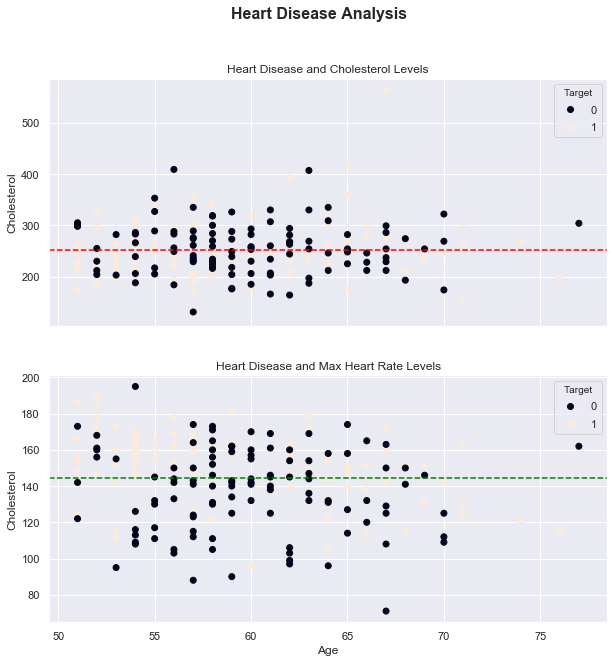

In [58]:
# Subplot of chol , age, thalach

fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10, 10),
                              sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50['age'],
                     y=over_50['chol'],
                     c=over_50['target'])

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
       ylabel="Cholesterol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(over_50['chol'].mean(),
           linestyle='--',
           c='red')

# Add data to ax1
scatter = ax1.scatter(x=over_50['age'],
                     y=over_50['thalach'],
                     c=over_50['target'])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
       xlabel="Age",
       ylabel="Cholesterol")

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a mean-line
ax1.axhline(over_50['thalach'].mean(),
           linestyle='--',
           c='green')

# Add atitle to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

## Customizing Matplotlib plots and getting stylish

In [59]:
## See the different styles available
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [60]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500


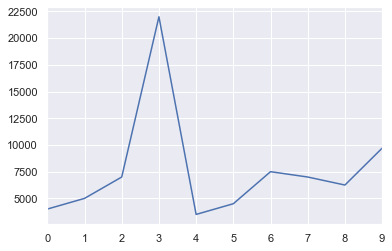

In [61]:
df['Price'].plot();

In [62]:
plt.style.use('seaborn-whitegrid')

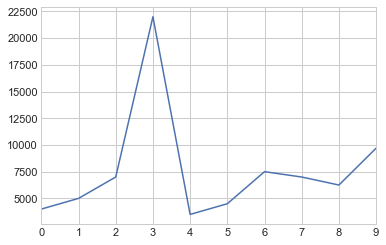

In [63]:
df['Price'].plot();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


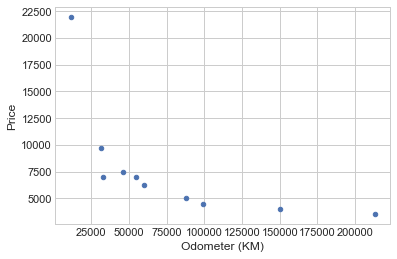

In [64]:
# Scatter plot
df.plot(x= "Odometer (KM)", y="Price", kind="scatter");

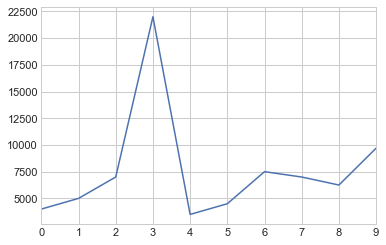

In [65]:
df['Price'].plot();

In [66]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

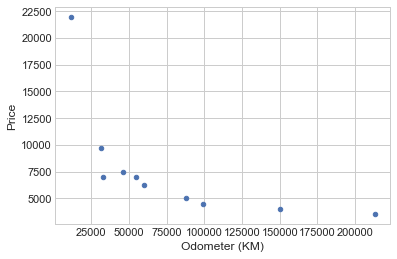

In [67]:
# Scatter plot
df.plot(x= "Odometer (KM)", y="Price", kind="scatter");

In [68]:
# Crete some data
x = np.random.randn(10, 4)
x

array([[-0.56630959,  1.86795527, -1.71038781, -0.92971508],
       [-0.20766809, -0.55642538, -0.23205741,  0.07757111],
       [ 1.22861271, -0.83552107, -0.13659688,  0.49481782],
       [ 0.55111017, -0.06984385,  1.10342208,  0.59325536],
       [ 1.39217437, -0.74207196, -1.13446211, -1.65699183],
       [-0.1779279 ,  0.23388669,  1.96828807,  0.29086046],
       [ 2.01084235,  1.52992998, -1.79717149, -0.48610483],
       [-1.02281712, -0.29376547,  0.64453205, -0.14394147],
       [ 1.56933301,  0.23604526,  0.5408487 , -0.10765357],
       [-0.27928021,  0.6366429 , -0.50875223,  0.35493777]])

In [69]:
new_data = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
new_data

,a,b,c,d
0,-0.566310,1.867955,-1.710388,-0.929715
1,-0.207668,-0.556425,-0.232057,0.077571
2,1.228613,-0.835521,-0.136597,0.494818
3,0.551110,-0.069844,1.103422,0.593255
4,1.392174,-0.742072,-1.134462,-1.656992
5,-0.177928,0.233887,1.968288,0.290860
6,2.010842,1.529930,-1.797171,-0.486105
7,-1.022817,-0.293765,0.644532,-0.143941
8,1.569333,0.236045,0.540849,-0.107654
9,-0.279280,0.636643,-0.508752,0.354938


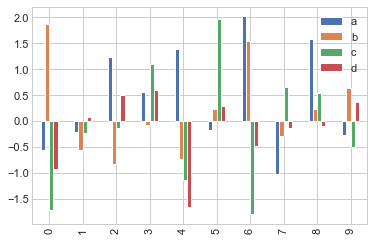

In [70]:
ax = new_data.plot(kind='bar');

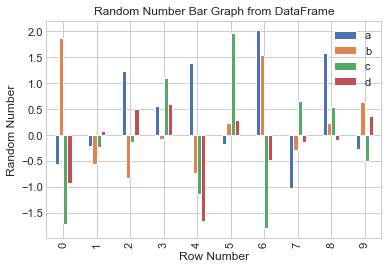

In [71]:
# customize the plot with the set() method
ax = new_data.plot(kind='bar')

# add some labels and title
ax.set(title="Random Number Bar Graph from DataFrame",
      xlabel="Row Number",
      ylabel="Random Number")

# Make the legend visible
ax.legend().set_visible(True);

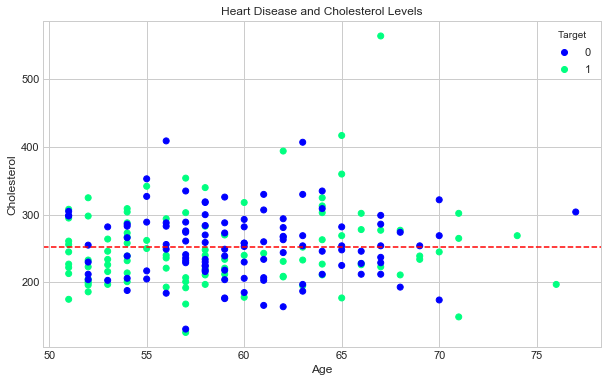

In [72]:
# Set the style
plt.style.use('seaborn-whitegrid')
## OO Matplotlib method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# plot the data
scatter = ax.scatter(x=over_50['age'],
                    y=over_50['chol'],
                    c=over_50['target'],
                    cmap="winter") # this changes the colour scheme


# Customize the plot
ax.set(title= "Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title='Target')

# Add a horizontal line
ax.axhline(over_50['chol'].mean(),
          linestyle='--',
          c='red');

## Customizing the plots by adjusting the axes limits

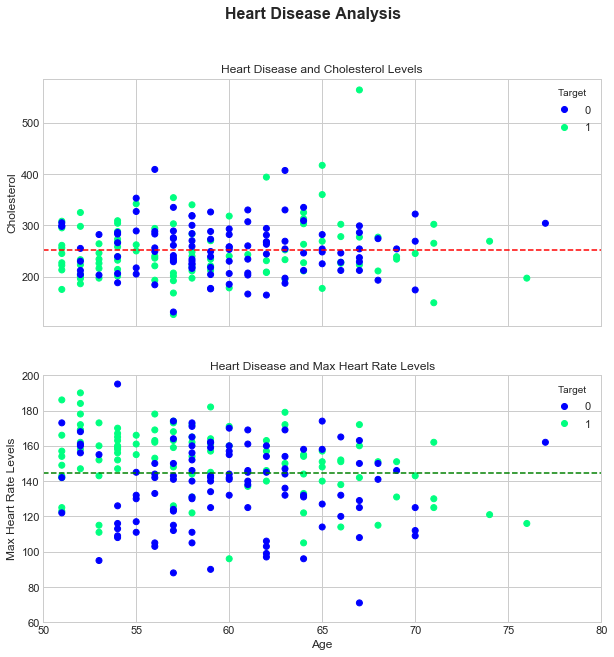

In [73]:
# Customizing the y and x axes limitation

# Subplot of chol , age, thalach

fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10, 10),
                              sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50['age'],
                     y=over_50['chol'],
                     c=over_50['target'],
                     cmap="winter")

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
       ylabel="Cholesterol")

# Change the ax0 x-axis limits
ax0.set_xlim([50, 80])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(over_50['chol'].mean(),
           linestyle='--',
           c='red')

# Add data to ax1
scatter = ax1.scatter(x=over_50['age'],
                     y=over_50['thalach'],
                     c=over_50['target'],
                     cmap="winter")

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
       xlabel="Age",
       ylabel="Max Heart Rate Levels")

# Change the ax1 x-axis limits
ax1.set_xlim([50, 80])

# Change the ax1 y-axis limits
ax1.set_ylim([60, 200])

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a mean-line
ax1.axhline(over_50['thalach'].mean(),
           linestyle='--',
           c='green')

# Add title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

# Saving ans sharing our plots

In [74]:
fig.savefig("../data/figures/heart-disease-analysis-plot-saved-with-code.png")